In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=keras.datasets.imdb

In [3]:
(x_train,y_train),(x_test,y_test)=data.load_data(num_words=10000)

In [4]:
x_train.shape,y_train.shape

((25000,), (25000,))

In [5]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train,300)
x_test=keras.preprocessing.sequence.pad_sequences(x_test,300)

In [12]:
x_train.shape

(25000, 300)

In [9]:
x_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [1239, 5189,  137, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [24]:
model=keras.models.Sequential()
model.add(layers.Embedding(10000,50,input_length=300))#(25000,300,50)
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 50)           500000    
                                                                 
 flatten_2 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1920128   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2420257 (9.23 MB)
Trainable params: 2420257 (9.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='binary_crossentropy',
             metrics=['acc']
             )

In [27]:
history=model.fit(x_train,
          y_train,
          epochs=15,
          batch_size=256,
          validation_data=(x_test,y_test)
         )

Epoch 1/15
98/98 [==============================] - 8s 73ms/step - loss: 0.5716 - acc: 0.6648 - val_loss: 0.3364 - val_acc: 0.8541
Epoch 2/15
98/98 [==============================] - 7s 72ms/step - loss: 0.1897 - acc: 0.9270 - val_loss: 0.3305 - val_acc: 0.8602
Epoch 3/15
98/98 [==============================] - 9s 88ms/step - loss: 0.0513 - acc: 0.9885 - val_loss: 0.3445 - val_acc: 0.8711
Epoch 4/15
98/98 [==============================] - 9s 91ms/step - loss: 0.0107 - acc: 0.9992 - val_loss: 0.3862 - val_acc: 0.8711
Epoch 5/15
98/98 [==============================] - 9s 95ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4118 - val_acc: 0.8730
Epoch 6/15
98/98 [==============================] - 9s 89ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.4329 - val_acc: 0.8737
Epoch 7/15
98/98 [==============================] - 9s 89ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4504 - val_acc: 0.8736
Epoch 8/15
98/98 [==============================] - 9s 91ms/step - loss: 7.9757e-04

In [28]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

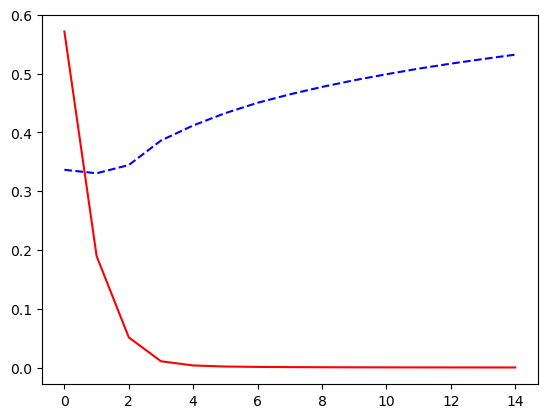

In [31]:
plt.plot(history.epoch,history.history['loss'],'r')
plt.plot(history.epoch,history.history['val_loss'],'b--')

# 解决过拟合问题
1. dropout
2. l2,l1

In [54]:
model=keras.models.Sequential()
model.add(layers.Embedding(10000,50,input_length=300))#(25000,300,50)

# model.add(layers.Flatten())#三维变二维
model.add(layers.GlobalAveragePooling1D())#通过全连接层，展平数据

model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [51]:
model.summary()#Flatten展开模型

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 300, 50)           500000    
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               1920128   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2420257 (9.23 MB)
Trainable params: 2420257 (9.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.summary()#GlobalAveragePooling1D全连接模型

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 300, 50)           500000    
                                                                 
 global_average_pooling1d_5  (None, 50)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_16 (Dense)            (None, 128)               6528      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 506657 (1.93 MB)
Trainable params: 506657 (1.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['acc']
             )

In [ ]:
history=model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=256,
          validation_data=(x_test,y_test)
         )

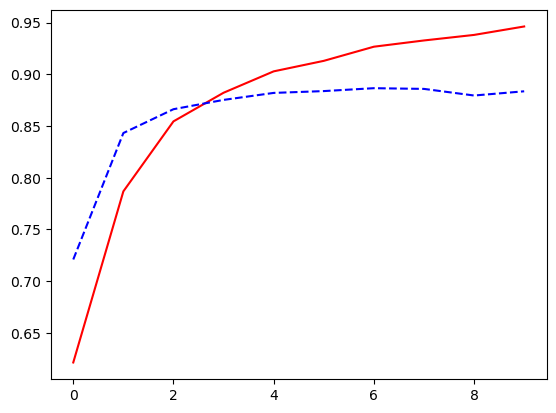

In [57]:
plt.plot(history.epoch,history.history['acc'],'r')
plt.plot(history.epoch,history.history['val_acc'],'b--')